# Рубежный контроль №2

Попова И.
ИУ5-21М

## Тема: Методы построения моделей машинного обучения.

В рамках рубежного контроля Вы можете решить на выбор или 1) задачу классификации текста или 2) задачу классификации/регрессии/кластеризации данных (по вариантам).

## Задача 1. Классификация текстов на основе методов наивного Байеса.

Данный вариант выполняется на основе материалов лекции часть 1 и часть 2.

Необходимо решить задачу классификации текстов на основе любого выбранного Вами датасета (кроме примера, который рассматривался в лекции). Классификация может быть бинарной или многоклассовой. Целевой признак из выбранного Вами датасета может иметь любой физический смысл, примером является задача анализа тональности текста.

Необходимо сформировать признаки на основе CountVectorizer или TfidfVectorizer.

В качестве классификаторов необходимо использовать два классификатора, не относящихся к наивным Байесовским методам (например, LogisticRegression, LinearSVC), а также Multinomial Naive Bayes (MNB), Complement Naive Bayes (CNB), Bernoulli Naive Bayes.

Для каждого метода необходимо оценить качество классификации с помощью хотя бы двух метрик качества классификации (например, Accuracy, ROC-AUC).

Сделате выводы о том, какой классификатор осуществляет более качественную классификацию на Вашем наборе данных.

In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
import matplotlib.pyplot as plt

Загрузка данных

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers'))

Формируем признаки

In [0]:
vectorizer = TfidfVectorizer()
vectorizer.fit(newsgroups_train.data + newsgroups_test.data)

X_train = vectorizer.transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

y_train = newsgroups_train.target
y_test = newsgroups_test.target

Построение и обучение моделей

In [0]:
def check_model(model,ax):
    print(model)
    
    model.fit(X_train, y_train)
    print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
    plot_confusion_matrix(model, X_test, y_test, display_labels=newsgroups_test.target_names, cmap=plt.cm.Blues, ax=ax)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy: 0.8048327137546468


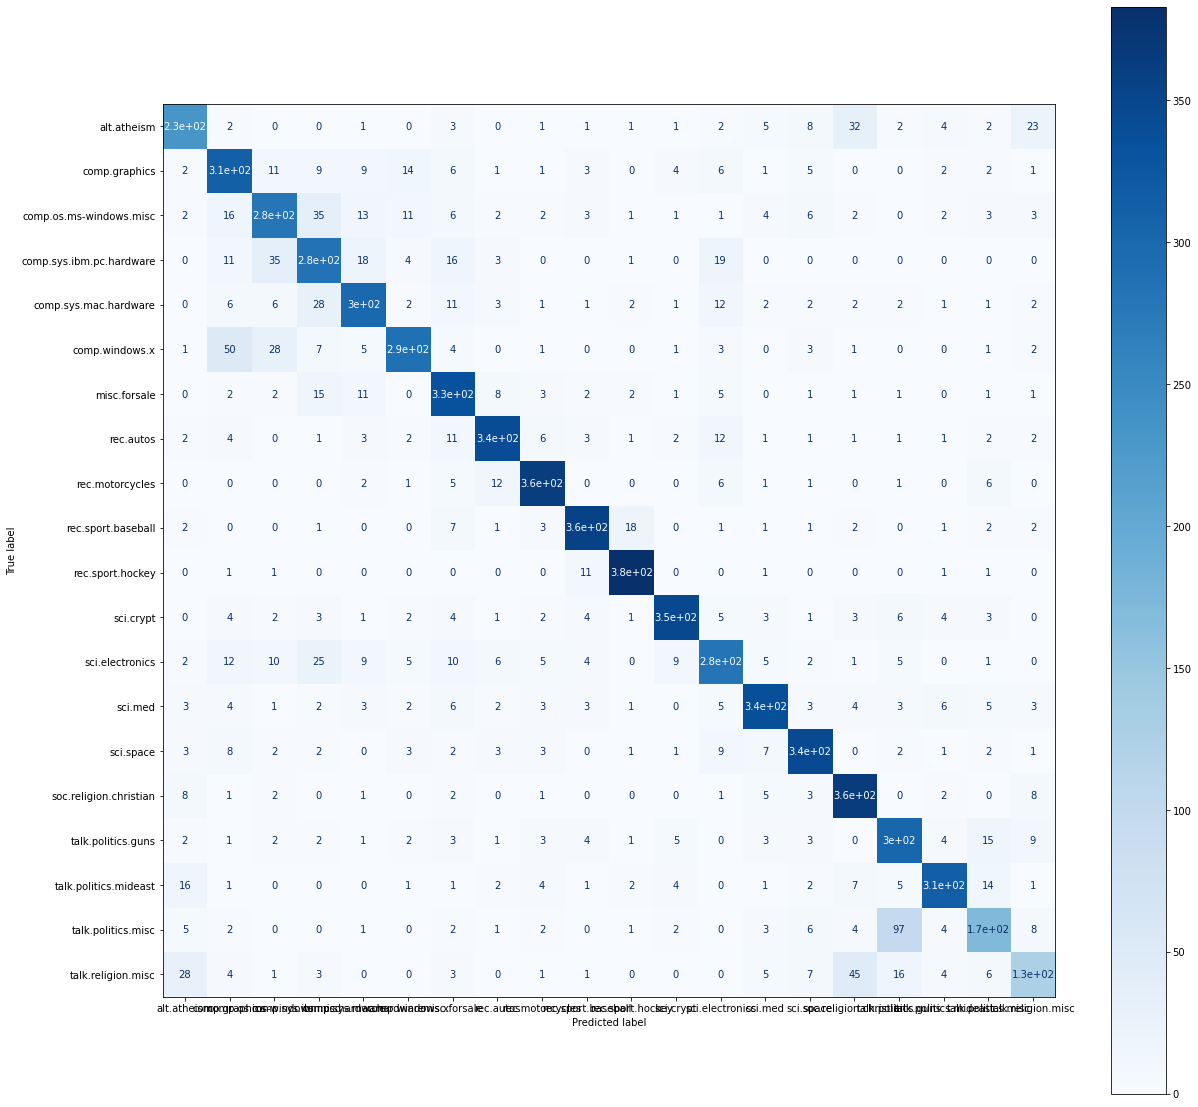

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
check_model(LinearSVC(), ax)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy: 0.72623473181094


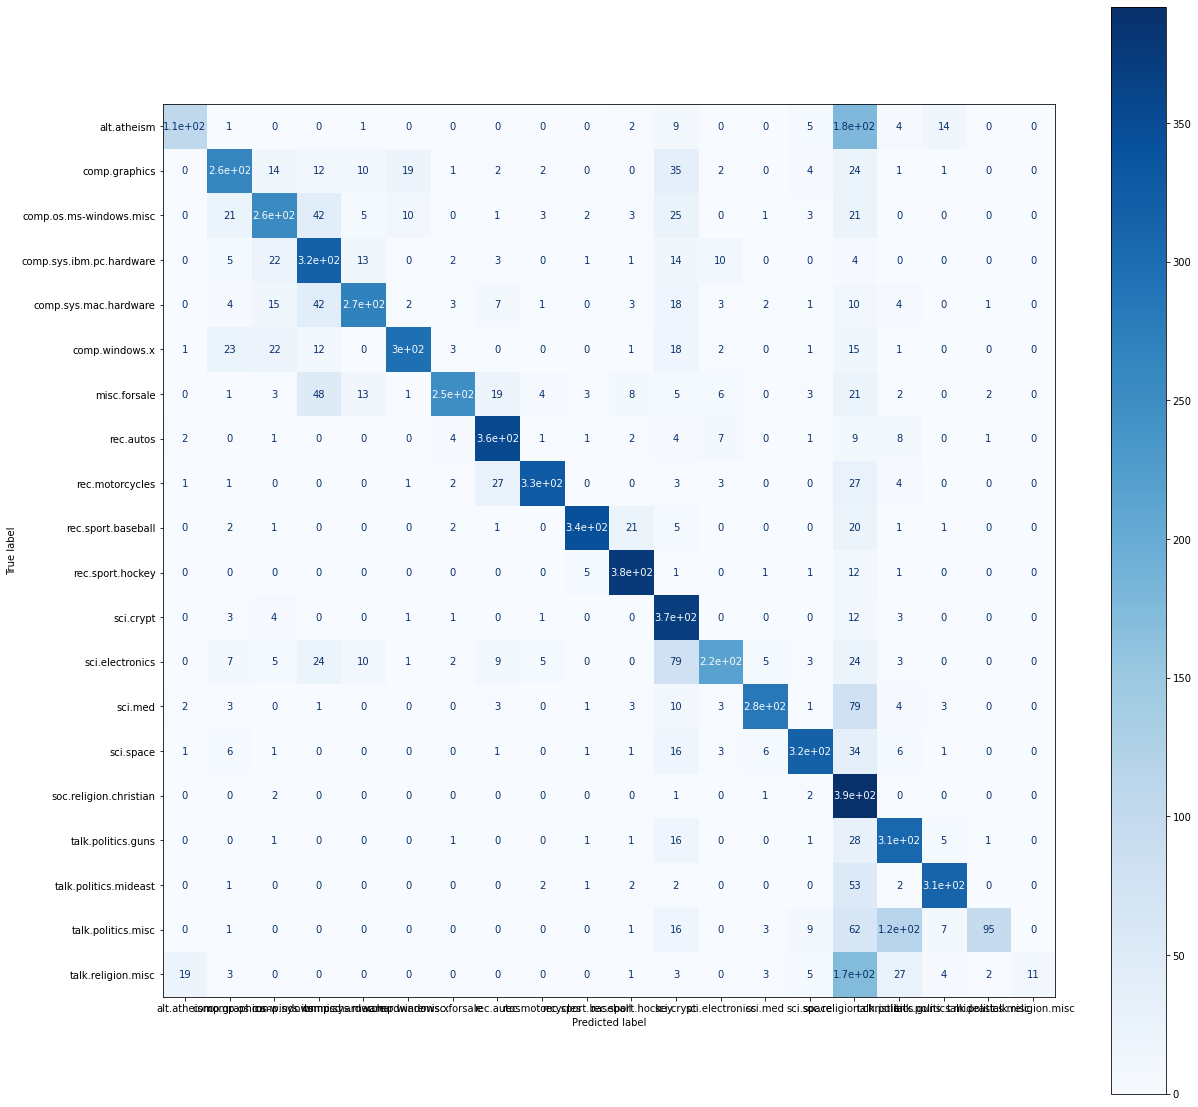

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
check_model(MultinomialNB(),ax)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.774429102496017


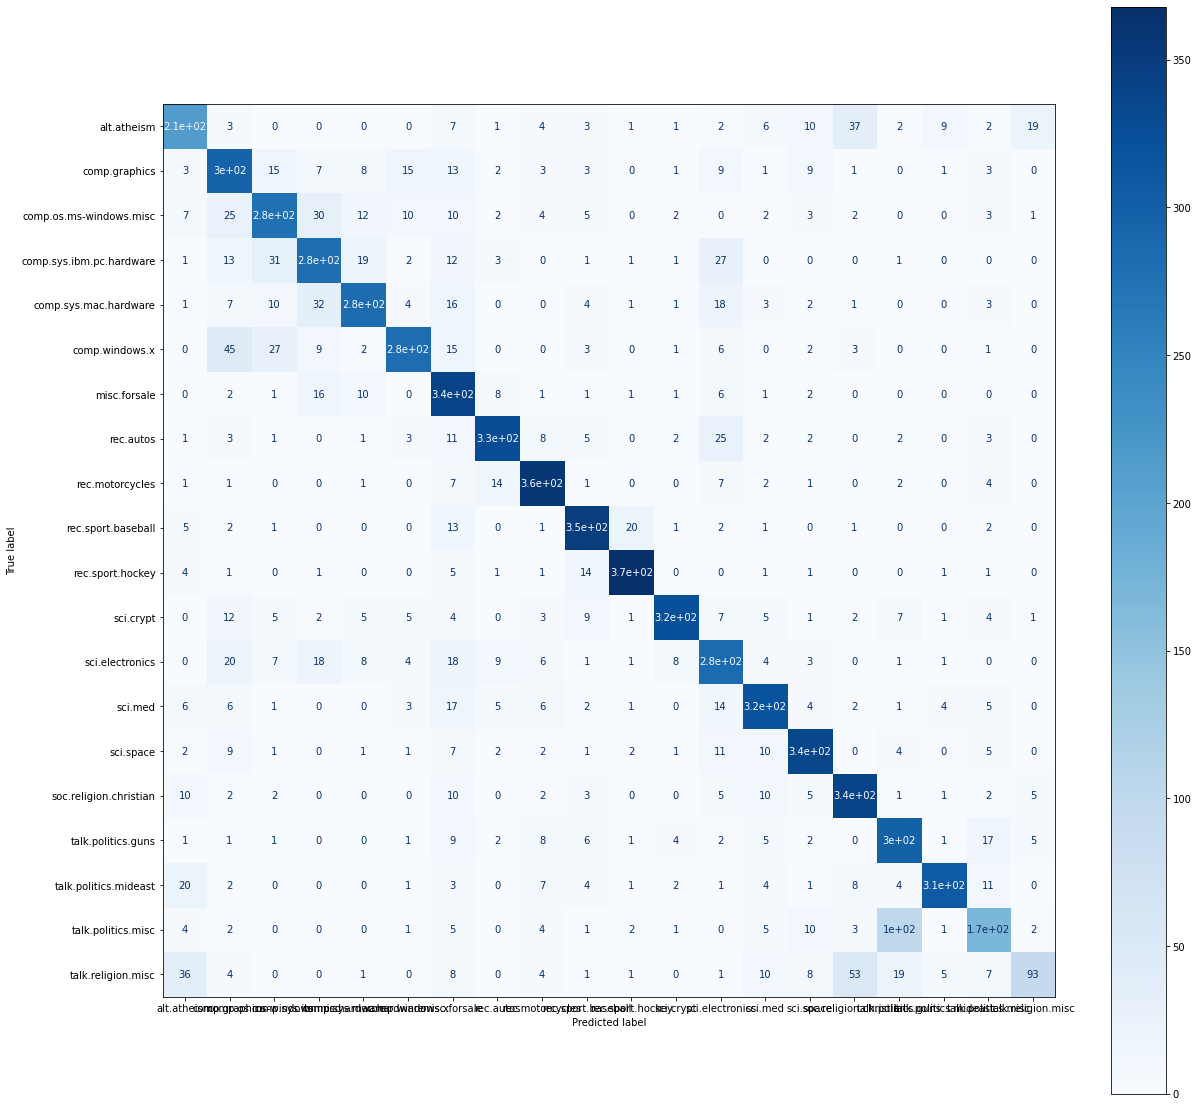

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
check_model(LogisticRegression(), ax)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Accuracy: 0.5371747211895911


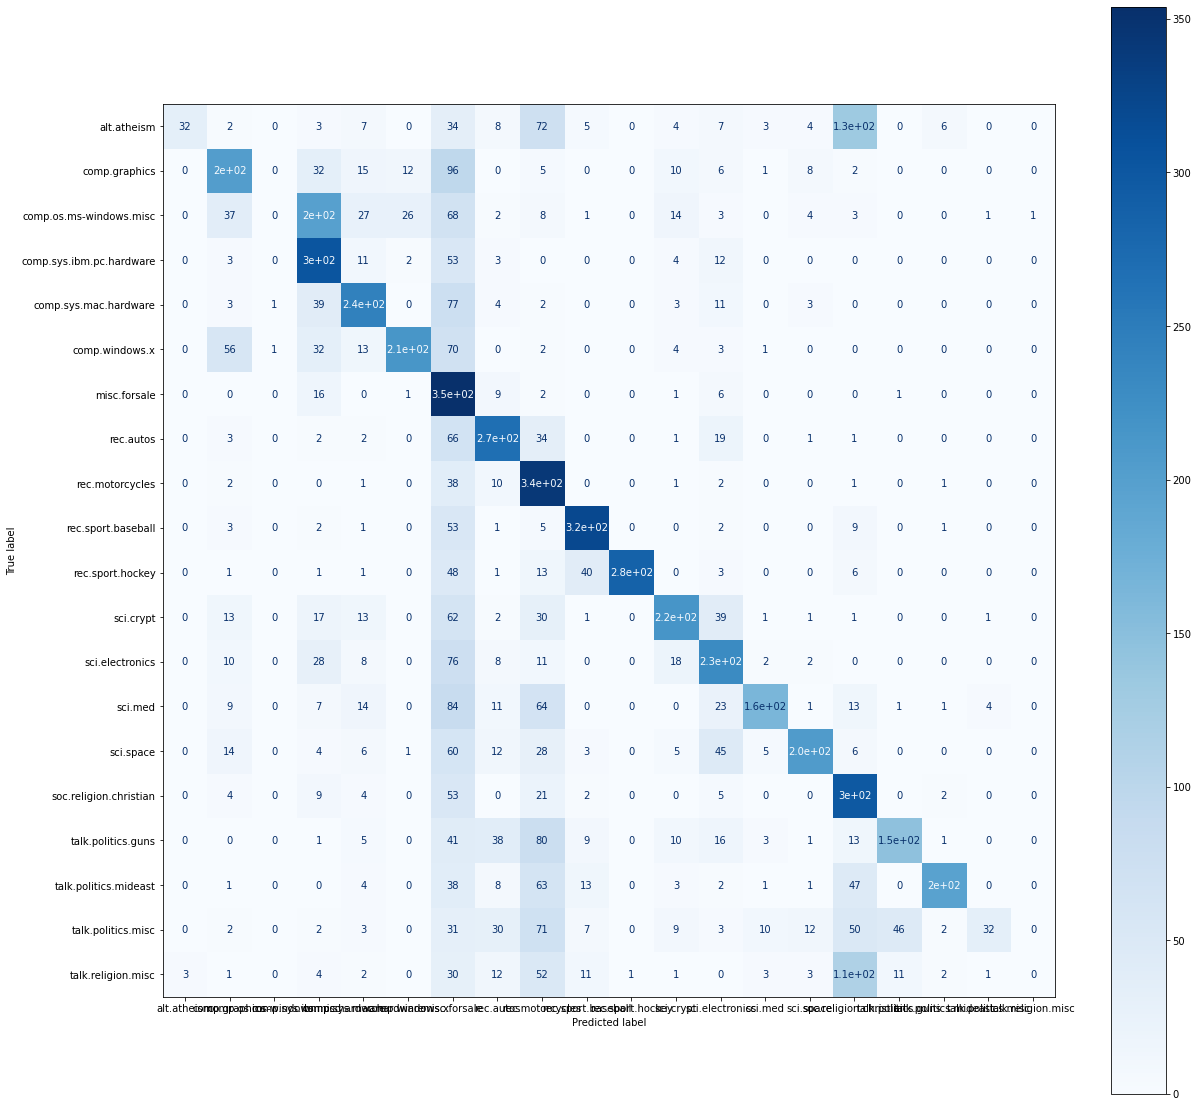

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
check_model(BernoulliNB(),ax)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
Accuracy: 0.8089484864577802


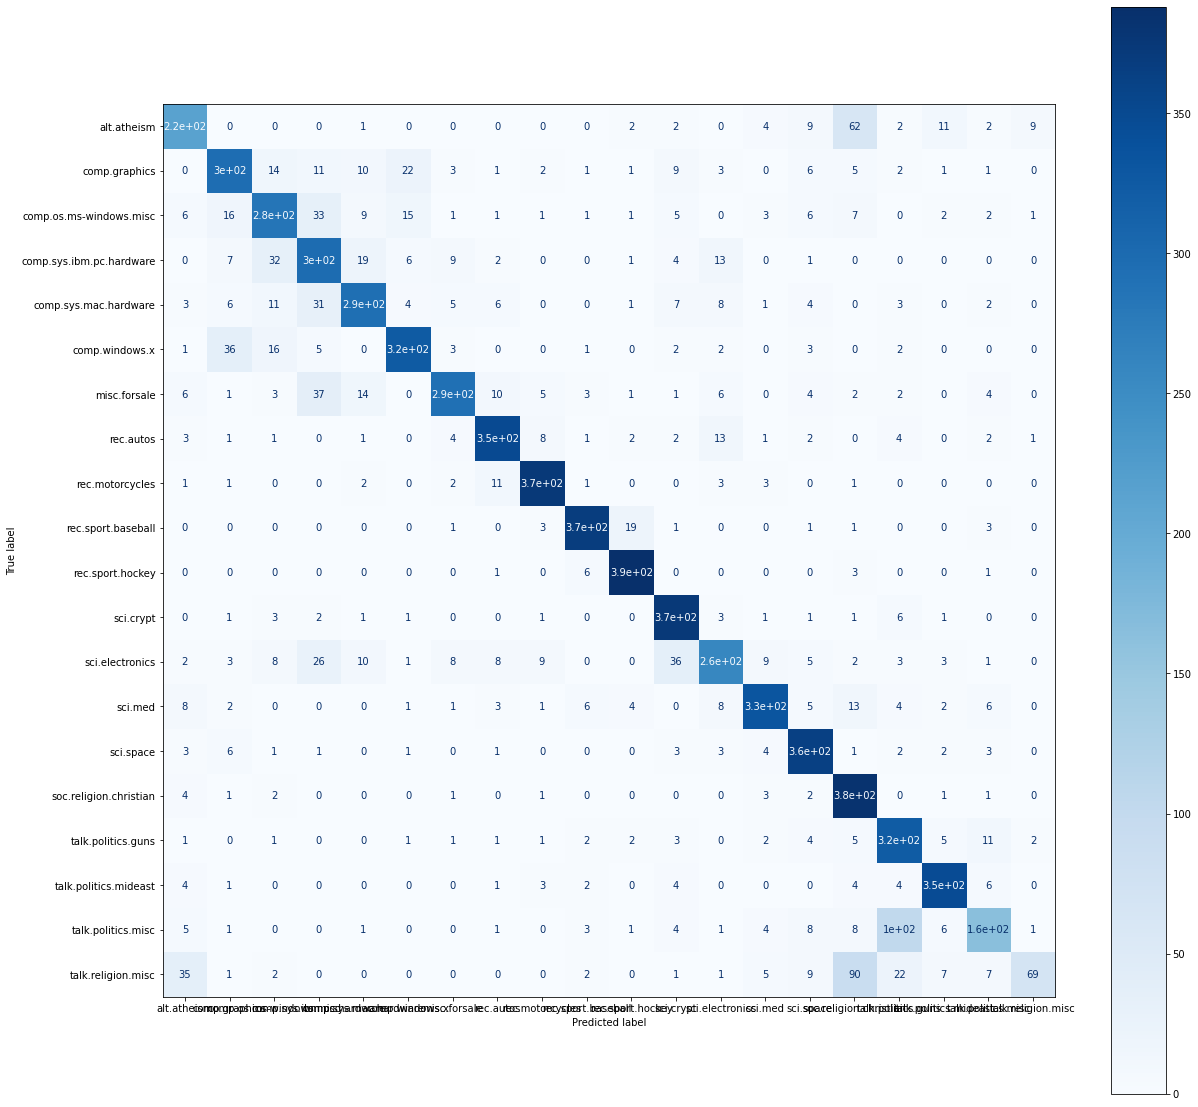

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
check_model(ComplementNB(),ax)

## Вывод
При выполнении РК2 были построены и обучены модели для классификации текстов из датасета 20newsgroups. В результате метод Complement Naive Bayes позволил достичь наивысшей точности.